In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([0.3,0.9,0.8,1.4,1.5,2])
y = np.array([ 5.7,  7.2,  7.6,  9.3,  9.1, 11.1 ])
y

array([ 5.7,  7.2,  7.6,  9.3,  9.1, 11.1])

In [3]:
b1 = (((x*y).sum()/len(x)) - (x.mean()*y.mean()))/(((x*x)/len(x)).sum() - (x.mean()**2))
b1

np.float64(3.1074380165289206)

In [4]:
b0  = y.mean() - b1*x.mean()
b0


np.float64(4.759779614325074)

<h1 style="color: Yellow">Linear Regression</h1>

In [5]:
from sklearn.linear_model import LinearRegression

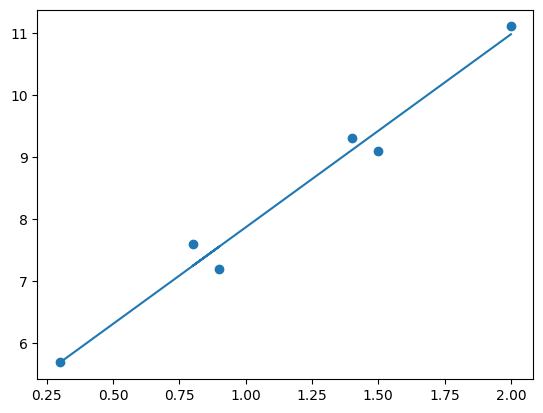

In [6]:
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y) # x takes 2d array as input // fit performs simple regression on the given input
lr.intercept_
yi = lr.coef_*x + lr.intercept_
plt.plot(x,yi)
plt.scatter(x,y)


<h1 style="color: Yellow">Exploring Datasets</h1>

In [7]:
import pandas as pd

In [8]:
insure = pd.read_csv('../Datasets/Insure_auto.csv')
X = insure[['Home','Automobile']] #parameters 
y = insure['Operating_Cost'] #output 

lr.fit(X,y) # linear regression using 2 vairables
lr.intercept_,lr.coef_

(np.float64(-10084.213130948774), array([167.32668857,  54.10529229]))

(array([111.05405476]), np.float64(12337.458724422133))

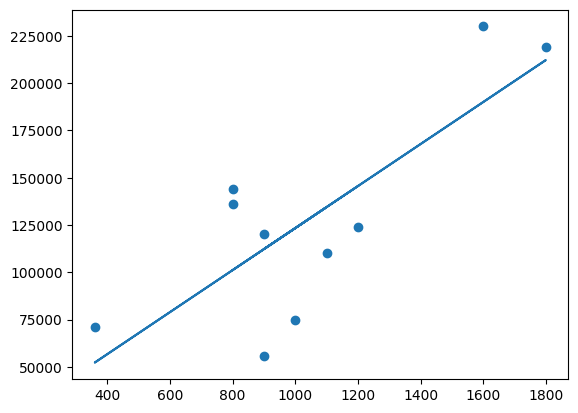

In [9]:
insure = pd.read_csv('../Datasets/Insure_auto.csv')
X = insure[['Automobile']] #parameters 
y = insure['Operating_Cost'] #output 

lr.fit(X,y) # linear regression using 2 vairables
yi = lr.coef_*X + lr.intercept_
plt.plot(X,yi)
plt.scatter(X,y)
lr.coef_,lr.intercept_

(array([215.21298174]), np.float64(23045.638945233266))

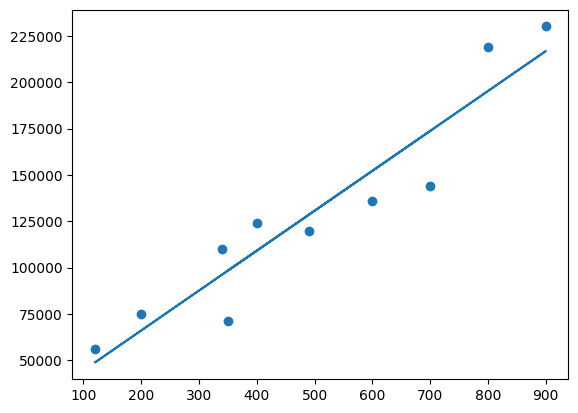

In [10]:
insure = pd.read_csv('../Datasets/Insure_auto.csv')
X = insure[['Home']] #parameters 
y = insure['Operating_Cost'] #output 

lr.fit(X,y) # linear regression using 2 vairables
yi = lr.coef_*X + lr.intercept_
plt.plot(X,yi)
plt.scatter(X,y)
lr.coef_,lr.intercept_

<h1 style="color: Yellow">Polynomial Regression</h1>

(array([ 8.00469073e+02, -2.22919040e+00,  2.91531183e-03, -1.20329682e-06]),
 np.float64(-14758.94183144928))

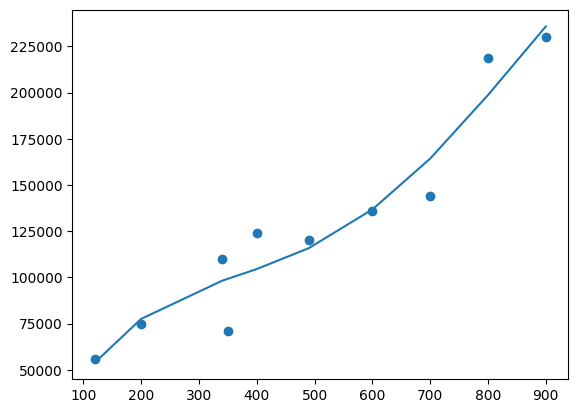

In [11]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(include_bias=False,degree=4).set_output(transform='pandas') #polynomial features
insure2 = insure.sort_values(by='Home')
X = insure2[['Home']] #parameters 
y = insure2['Operating_Cost'] #output 

X = pr.fit_transform(X)

lr.fit(X,y)
# yi = lr.coef_*X + lr.intercept_
# plt.plot(X,yi)
# plt.scatter(X,y)
# lr.coef_,lr.intercept_

x = lr.coef_*X
x = x.sum(axis = 1)
yi = x + lr.intercept_
X = insure2[['Home']]
plt.plot(X,yi)
plt.scatter(X,y)
lr.coef_,lr.intercept_
# yi,x

# lr.coef_
# X

In [12]:
insure = pd.read_csv('../Datasets/Insure_auto.csv')
X = insure[['Home','Automobile']] #parameters 
y = insure['Operating_Cost'] #output 

X = pr.fit_transform(X)

lr.fit(X,y) # linear regression using 2 vairables
lr.intercept_,lr.coef_
# X

(np.float64(-10871.876286675892),
 array([ 2.67411698e-07,  8.19063398e-06, -2.18150322e-04,  1.54206925e-03,
         5.14903437e-03,  1.01869182e-02, -9.15964223e-03,  2.06884171e-03,
         2.56785856e-04, -6.53582741e-06, -5.57059024e-08,  3.43265189e-06,
        -4.56341363e-07, -3.40375540e-07]))

<h1 style="color: Yellow">Train test split</h1>

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_error

train,test = train_test_split(insure,test_size=0.3,random_state=25)
X_train = train[['Home','Automobile']]
y_train = train['Operating_Cost']
X_test = test[['Home','Automobile']]
y_test = test['Operating_Cost']

In [14]:
lr.fit(X_train,y_train)
lr.coef_

# predicting for test dataset
lr.predict(X_test) #predicted values for test set
y_predict = lr.predict(X_test)

In [15]:
#evaluating model
r2_score(y_test,y_predict)

0.9903677053376259

In [16]:
root_mean_squared_error(y_test,y_predict)

6756.685258305534

<h1 style="color: Yellow">Polynomial Expressions with spliting data</h1>

In [17]:
poly = PolynomialFeatures(degree= 3, include_bias=False) #creating polynomial feature of degree 2 

X = insure[['Home','Automobile']]
y = insure['Operating_Cost']

X_poly = poly.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.3,random_state=25)
lr.fit(X_train,y_train) #creating model 

y_pred = lr.predict(X_test) #predicting on test dataset

mean_absolute_error(y_test,y_pred) #Evaluting the model

343561.7745664355

<h1 style="color: Orange">Boston Housing</h1>

In [18]:
boston = pd.read_csv('../Datasets/Boston.csv')

X = boston.drop('medv', axis=1)
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mean_absolute_error(y_test, y_pred)

3.1175694194800987

In [19]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=25)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mean_absolute_error(y_test, y_pred)

2.6635485509433483

In [20]:
poly = PolynomialFeatures(degree=3, include_bias=False)

X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=25)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mean_absolute_error(y_test, y_pred)

193.45222158687918

<h1 style = 'color: Orange'>Housing</h1>

In [21]:
#first degree equation
housing = pd.read_csv('../Datasets/Housing.csv')
dums_hous = pd.get_dummies(housing,drop_first=True)
X = dums_hous.drop('price',axis = 1)
y = dums_hous['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mean_absolute_error(y_test,y_pred)

11600.941705536448

In [22]:
#Second degree equation
housing = pd.read_csv('../Datasets/Housing.csv')
poly = PolynomialFeatures(degree=2,include_bias=False)
dums_hous = pd.get_dummies(housing,drop_first=True)
X = dums_hous.drop('price',axis = 1)
y = dums_hous['price']

X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=25)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mean_absolute_error(y_test,y_pred)

12967.811723499355

In [23]:
#Third degree equation
housing = pd.read_csv('../Datasets/Housing.csv')
poly = PolynomialFeatures(degree=3,include_bias=False)
dums_hous = pd.get_dummies(housing,drop_first=True)
X = dums_hous.drop('price',axis = 1)
y = dums_hous['price']

X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=25)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mean_absolute_error(y_test,y_pred)

18546.459691175853

In [24]:
#Fourth degree equation
housing = pd.read_csv('../Datasets/Housing.csv')
poly = PolynomialFeatures(degree=4,include_bias=False)
dums_hous = pd.get_dummies(housing,drop_first=True)
X = dums_hous.drop('price',axis = 1)
y = dums_hous['price']

X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=25)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mean_absolute_error(y_test,y_pred)

15444.615107732472